In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense,Conv2D,UpSampling2D,MaxPooling2D,Input
from keras.models import Sequential,Model

from keras.preprocessing.image import img_to_array,load_img

Using TensorFlow backend.


In [2]:
train_noisy = pd.read_csv('DirtyDocumentsDenoising/train_noised.csv')

In [3]:
print(train_noisy.head())

   Unnamed: 0  label
0           0  1.png
1           1  2.png
2           2  3.png
3           3  4.png
4           4  5.png


In [4]:
arr = []
for i in train_noisy['label']:
    s = "DirtyDocumentsDenoising/train_noised/" + str(i)
    arr.append(s)
train_noisy['path'] = arr
print(train_noisy.head())

   Unnamed: 0  label                                        path
0           0  1.png  DirtyDocumentsDenoising/train_noised/1.png
1           1  2.png  DirtyDocumentsDenoising/train_noised/2.png
2           2  3.png  DirtyDocumentsDenoising/train_noised/3.png
3           3  4.png  DirtyDocumentsDenoising/train_noised/4.png
4           4  5.png  DirtyDocumentsDenoising/train_noised/5.png


In [5]:
arr = []
for i in train_noisy['label']:
    s = "DirtyDocumentsDenoising/train_cleaned/" + str(i)
    arr.append(s)
train_noisy['path1'] = arr
print(train_noisy.head())

   Unnamed: 0  label                                        path  \
0           0  1.png  DirtyDocumentsDenoising/train_noised/1.png   
1           1  2.png  DirtyDocumentsDenoising/train_noised/2.png   
2           2  3.png  DirtyDocumentsDenoising/train_noised/3.png   
3           3  4.png  DirtyDocumentsDenoising/train_noised/4.png   
4           4  5.png  DirtyDocumentsDenoising/train_noised/5.png   

                                         path1  
0  DirtyDocumentsDenoising/train_cleaned/1.png  
1  DirtyDocumentsDenoising/train_cleaned/2.png  
2  DirtyDocumentsDenoising/train_cleaned/3.png  
3  DirtyDocumentsDenoising/train_cleaned/4.png  
4  DirtyDocumentsDenoising/train_cleaned/5.png  


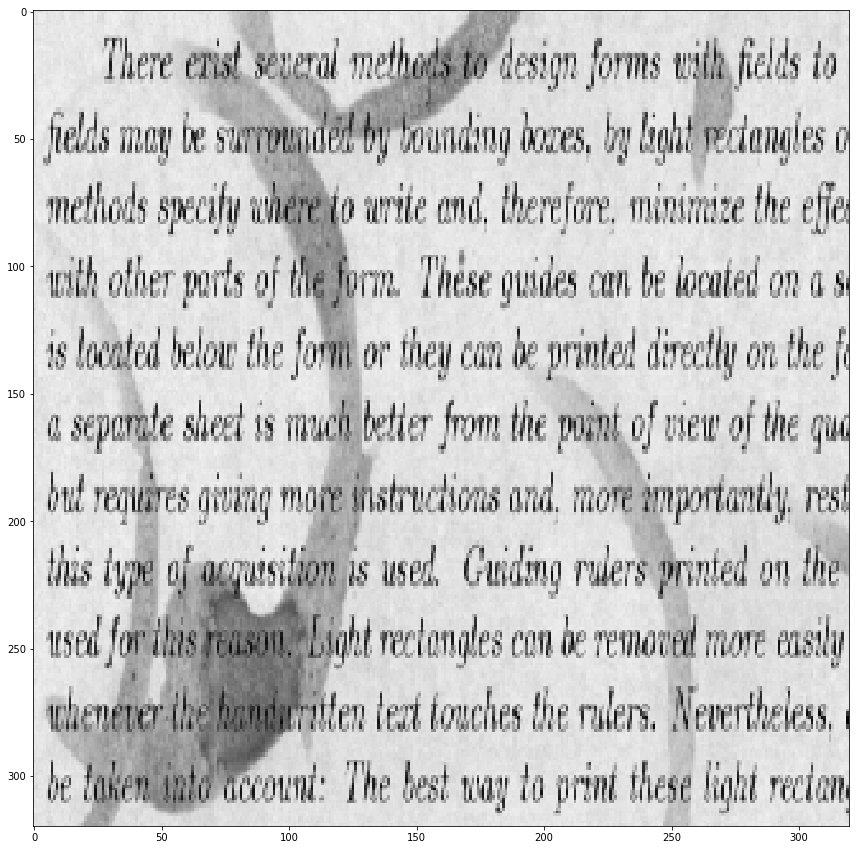

In [8]:
img = load_img(train_noisy['path'][0],target_size=(320,320))
fig = plt.figure(figsize=(15,15))
plt.imshow(img)

In [9]:
# data loading.......
def load_imgg(path):
    ret_arr = []
    for i in path:
        img = load_img(i,target_size=(320,320))
        img = img_to_array(img)
        img = img.astype('float32') / 255.
        ret_arr.append(img)
    return ret_arr

In [10]:
train_noised = np.array(load_imgg(train_noisy['path']))
print(train_noised.shape)

(144, 320, 320, 3)


In [11]:
train_cleaned = np.array(load_imgg(train_noisy['path1']))
print(train_cleaned.shape)

(144, 320, 320, 3)


In [13]:
img = Input(shape=(320,320,3))

encoder = Conv2D(32,(3,3),activation='relu',padding='same')(img)
encoder = MaxPooling2D((2,2))(encoder)

encoder = Conv2D(16,(3,3),activation='relu',padding='same')(encoder)
encoder = MaxPooling2D((2,2))(encoder)


decoder = Conv2D(16,(3,3),activation='relu',padding='same')(encoder)
decoder = UpSampling2D((2,2))(decoder)

decoder = Conv2D(32,(3,3),activation='relu',padding='same')(decoder)
decoder = UpSampling2D((2,2))(decoder)

decoded = Conv2D(3,(3,3),activation='sigmoid',padding='same')(decoder)

In [14]:
autoencoder = Model(img,decoded)

In [26]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')
autoencoder.fit(train_noised,train_cleaned,epochs=10,batch_size=8)

Epoch 1/10
144/144 [==============================] - 68s 474ms/step - loss: 0.3487
Epoch 2/10
144/144 [==============================] - 70s 483ms/step - loss: 0.3298
Epoch 3/10
144/144 [==============================] - 69s 477ms/step - loss: 0.2883
Epoch 4/10
144/144 [==============================] - 69s 477ms/step - loss: 0.2555
Epoch 5/10
144/144 [==============================] - 69s 480ms/step - loss: 0.2426
Epoch 6/10
144/144 [==============================] - 68s 473ms/step - loss: 0.2324
Epoch 7/10
144/144 [==============================] - 68s 472ms/step - loss: 0.2267
Epoch 8/10
144/144 [==============================] - 68s 473ms/step - loss: 0.2227
Epoch 9/10
144/144 [==============================] - 68s 473ms/step - loss: 0.2194
Epoch 10/10
144/144 [==============================] - 68s 473ms/step - loss: 0.2161


In [27]:
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 320, 320, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 320, 320, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 160, 160, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 160, 160, 16)      4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 80, 80, 16)        2320      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 160, 160, 16)      0         
__________

In [28]:
print(train_noised[1].shape)

(320, 320, 3)


In [29]:
pred = autoencoder.predict(train_noised[:5])

In [30]:
print(pred.shape)

(5, 320, 320, 3)


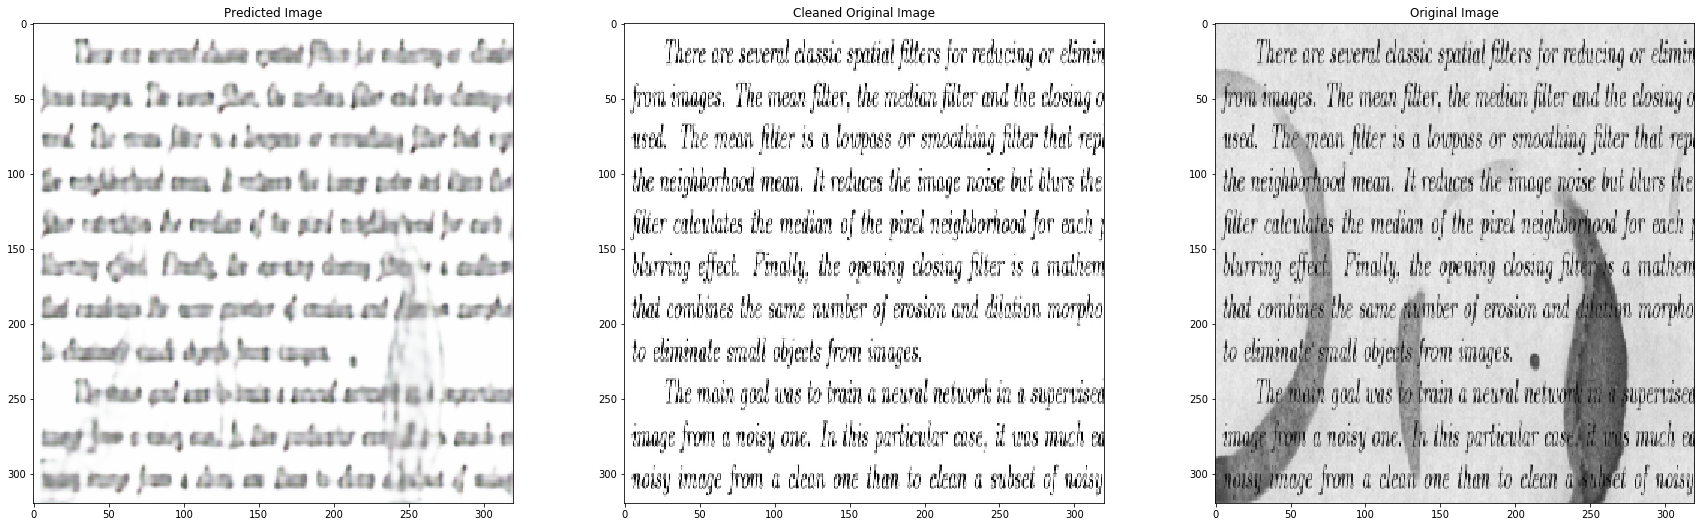

In [37]:
fig = plt.figure(figsize=(30,30))
plt.subplot(3,3,1)
plt.title("Predicted Image")
plt.imshow(pred[1])

plt.subplot(3,3,2)
plt.title("Cleaned Original Image")
plt.imshow(train_cleaned[1])

plt.subplot(3,3,3)
plt.title("Original Image")
plt.imshow(train_noised[1])

